

## Project Statements:
Author: Nd Nyah

- Aim
This project is aimed at performing unsupervised classification solution using few sets of class examples labelled by an expert. Inertia method of clustering is used to find the number of clusters.

- Implementations overview:
  - Preparatory Analysis 
    - Data uploads, cleaning and conversions
    - Statistical Data Analysis- data fits/assumptions
  - Machine Learning methods
    - Extended Analysis - codes
    - performance metrics, hypothesis and testing
  - Project challenges, exceptions and lesson learnt

- Systems Requirements/ running platform
  - This code is written using jupyter notebook running python 3.7
  - Key libaries
    - sklearn for model fitting and performance testing
    - pandas and numpy for data structure manipulations
    - scipy for statistical hypothesis testing.
    - seaborn and matplot for visualisations
  - It can be deploy to Azure, AWS or any open source cloud platform 

In [1]:
# systems setups

# import data structure libaries
import pandas as pd
import numpy as np

# import training model libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# import statistical and hypothesis testing libraries
from scipy import stats
import scipy.stats

# import visualisations libraries
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

#set fiqure size to control all plt plottings
plt.rcParams['figure.figsize']=(10,5)


### Preparatory Analysis 
    - Data upload,clean, select the required classes, and perform conversions
    - Statistical Data Analysis- data fits/assumptions

In [89]:
# Data upload
df21 = pd.read_csv('TrainData_ProfessionbyIndustry.csv', skiprows=0) # make skip row =0 so that you can see the headlines
df2 = df21.dropna()  # remove rows with any null values

# visualize columns variables and the length of the dataset(df2)
print(len(df2))
df2.columns   # this is useful to understand the data variable and naming convention 

#output explanation
# string category of JobTitle

26


Index(['Profession', 'Industry'], dtype='object')

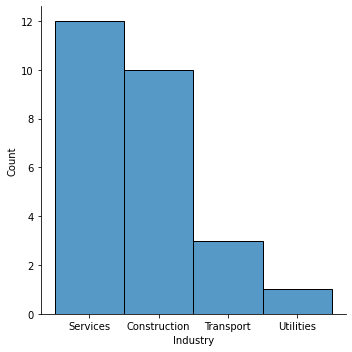

In [90]:
# Bar chart visualisation for data cleaning

output = sns.displot(data=df2, x="Industry")
print(output)

# output explanations:
#- this a string category variables with four classes
#- the last class is not among the classes for clustering, and requires removal

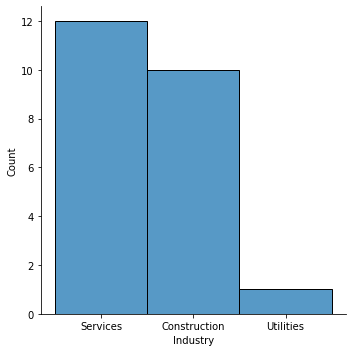

In [91]:
# remove the Utilities category

df_scu =[]

for i, row in df2.iterrows():
    if row['Industry'] == 'Transport':
        df2.drop(i)
    else:
        df_scu1 = row
        df_scu.append(df_scu1)


# convert to dataframe
df_scu2 = pd.DataFrame(df_scu, index= range(len(df_scu)))
len(df_scu2)   # length is now 23 a from the initial size of 26

output1 = sns.displot(data=df_scu2, x="Industry")
print(output1)

In [92]:
# conversion of category to numeric variables using one-hot-encoding
data21 = pd.concat([df_scu2.drop('Profession', axis=1), pd.get_dummies(df_scu2['Profession'],prefix='Proff')], axis=1)
Ind= data21.Industry.map({'Services': 1, 'Construction': 2, 'Utilities': 3})
data22 = pd.concat([data21.drop('Industry', axis = 1),Ind,pd.get_dummies(data21['Industry'],prefix='Ind')], axis =1)
data23= data22.drop('Industry', axis =1) # final outcome with industry weights
data23.head(2)

,Proff_Autoclenz car valeter,Proff_Car valeter,Proff_Carpenter,Proff_Civil engi,Proff_Decorator,Proff_Electrician,Proff_Ganger,Proff_Gas engineer,Proff_Heating engineer,Proff_Joinery,...,Proff_Plumber,Proff_Scaffolder,Proff_Social worker,Proff_Steel fixe,Proff_Trackman,Proff_Traffic ma,Proff_Welder,Ind_Construction,Ind_Services,Ind_Utilities
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


AxesSubplot(0.125,0.125;0.775x0.755)


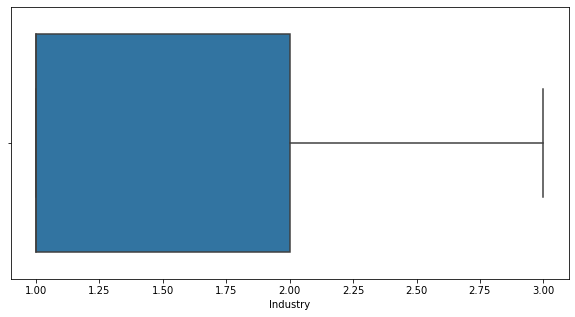

In [93]:
# check for outlier on the dataset

data2plt = sns.boxplot(x=data22['Industry'])
print(data2plt)


## Machine Learning methods
    - Extended Analysis 
       - scaling, features transformation/ reduction
       - clusters modeling
    - performance metrics
      - testing, hypothesis

In [94]:
# Numeric variable scaling to avoid overshooting of one variable against another

# target variable (yc)
target_name2 = 'Industry'
yc = data21[target_name2]

# data2 scaling - 
# standard score(zcore) assumption: Xc1 follows a normal distribution with mean:0 and std:1
Std_scaler = StandardScaler()
Xc1 = Std_scaler.fit_transform(data23)
Xc = stats.zscore(Xc1) 

print(Xc.shape)     # shape of the scaled data
Xc[0,:]              # sample from the first row and all coloumns

(23, 26)


array([-0.21320072,  4.69041576, -0.21320072, -0.21320072, -0.21320072,
       -0.21320072, -0.21320072, -0.21320072, -0.21320072, -0.21320072,
       -0.21320072, -0.21320072, -0.21320072, -0.21320072, -0.21320072,
       -0.21320072, -0.21320072, -0.21320072, -0.21320072, -0.21320072,
       -0.21320072, -0.21320072, -0.21320072, -0.87705802,  0.95742711,
       -0.21320072])

In [95]:
# Features transformation and reduction using PCA - to select most important components from the variables
# PCA assumption : the input Xc is the informative comprising of the main information and noise portion

# reduced to 2 columns for scatter ploting
pca = PCA(n_components=2, svd_solver='full')
Xc_pca = pca.fit(Xc).transform(Xc)

# convert to dataframe
Xc_pca_df = pd.DataFrame(Xc_pca).rename(columns={ 0: 'Pc1', 1: 'Pc2'}) 
Xc_pca_df.head(2)

,Pc1,Pc2
0,-1.619891,-0.256202
1,-1.619891,-0.256202


<AxesSubplot:>

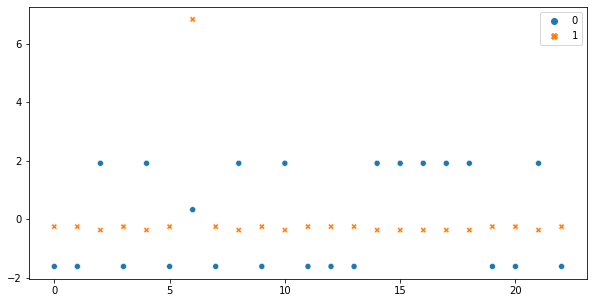

In [96]:
# scatter plot visualisation of PCA data distributions

#sns.scatterplot(principal components 0,and 1)
sns.scatterplot(data=Xc_pca)

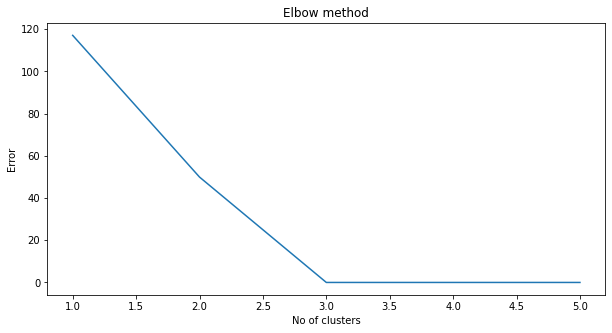

In [97]:
# choosing the best number of clusters

Error = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters = i).fit(Xc_pca)
    kmeans.fit(Xc_pca)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
y3= plt.plot(range(1, 6), Error)
y3= plt.title('Elbow method')
y3= plt.xlabel('No of clusters')
y3= plt.ylabel('Error')

# output explanation
# - inertia minimises the centroid movemnt over data point
# - the best k cluster is found with an elbow point label with lowest possible error, which begins to be stable over k
# - 3 clusters are choosen for the labeling of new samples

In [98]:
# Modeling and Methods using Kmeans and PCA features

# create an instance of cluster
km = KMeans(n_clusters = 3, random_state=5, max_iter=500)

# model fitting and evaluation
kmModel = km.fit(Xc_pca)
prediction_score = davies_bouldin_score(Xc_pca, kmModel.labels_)

# metric: evaluation using propability score index strength (-1 low or +1 high)
# the lower the score index, the better the performance
print('Prediction Score is: {0:0.12f}'.format(prediction_score))

Prediction Score is: 0.000000002999


In [106]:
# tabular visualisation of generated clusters against each category of Industry

df_scu2['clusters']= kmModel.labels_
#df_scu2.head(2)

In [100]:
# crosstab tabular visualisation showing all the expert labels for 23 - observations and their respective clusters

# 12 observations from Services belongs to cluster 0 - (0: Construction, 12:Services, 0: Utilities)
# 10 observations from Construction belongs to cluster 1  - (10: Construction, 0:Services, 0: Utilities) )
# 1 observation from Utilities belongs to cluster 2 - (0: Construction, 0:Services, 1: Utilities))

pd.crosstab(yc, kmModel.labels_)

col_0,0,1,2
Industry,,,
Construction,0,10,0
Services,12,0,0
Utilities,0,0,1


In [101]:
# generated centriod from clusters

Cent_c = kmModel.cluster_centers_   # 26 columns out of 26 columns for visualisation
print(Cent_c)

[[-1.6198907  -0.25620196]
 [ 1.9114982  -0.37633651]
 [ 0.32370635  6.83778868]]


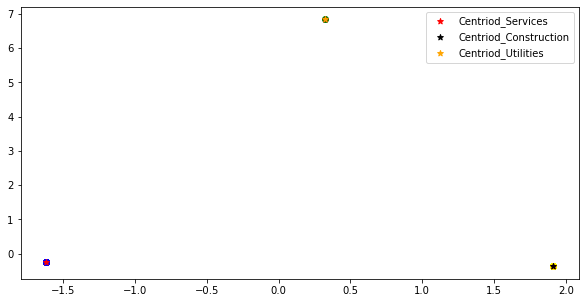

In [102]:
# visualization of clusters against the extracted PCA features from train cases
# to show the distributions of PCA train data points around the centroid

Services = Xc_pca_df[df_scu2.clusters==0] # derived from cluster model
Construction = Xc_pca_df[df_scu2.clusters==1] # derived from cluster model
Utilities = Xc_pca_df[df_scu2.clusters==2] # derived from cluster model

plt.scatter(Services['Pc1'], Services['Pc2'], color = 'blue' )  # pc1 and pc2 from new data 
plt.scatter(Construction['Pc1'], Construction['Pc2'], color = 'yellow' ) # pc1 and pc2 from new data
plt.scatter(Utilities['Pc1'], Utilities['Pc2'], color = 'green' ) # pc1 and pc2 from new data

plt.scatter(Cent_c[0:,0], Cent_c[0:,1], color = 'red', marker ='*', label='Centriod_Services') # from the cluster model
plt.scatter(Cent_c[1:,0], Cent_c[1:,1],  color = 'black', marker ='*', label='Centriod_Construction') # from the cluster model
plt.scatter(Cent_c[2:,0], Cent_c[2:,1],  color = 'orange', marker ='*', label='Centriod_Utilities') # from the cluster model

plt.legend()

In [103]:
# preprocess of new dataset for testing using the same steps used on the training data preparation

df3 = pd.read_csv('TestData-Profession.csv', skiprows=0) # make skip row =0 so that you can see the headlines
df4 = pd.concat([df3.drop('Profession', axis=1), pd.get_dummies(df3['Profession'],prefix='Profession')], axis=1)
X_test1 = df4.dropna()

target_cols3 = X_test1.columns 

# scaling
Std_scaler = StandardScaler()
tst_sample = Std_scaler.fit_transform(X_test1[target_cols3])

# reduced to 2 columns for scatter ploting
pca = PCA(n_components=2, svd_solver='full')
tst_pca = pca.fit(tst_sample).transform(tst_sample)
tst_pca_n= stats.zscore(tst_pca)

# convert to dataframe
tst_pca_df = pd.DataFrame(tst_pca_n).rename(columns={ 0: 'Pc1t', 1: 'Pc2t'}) 
  

In [107]:
# prediction of new categories from the test data using the expert labelled classes

# prediction using a trained model
tst_predicted_clusters = kmModel.predict(tst_pca_n)

# prediction score index- the smaller the index the better the performance of classification
prediction_score1 = davies_bouldin_score(tst_pca_n, y_predicted_test)
print('Prediction Score for test data is: {0:0.5f}'.format(prediction_score1))


df3['Classified_Output_Clusters'] = tst_predicted_clusters
#df3.head(2)

# cluster names
# 0 - Services
# 1 - Constructions
# 2 - Utilities

Prediction Score for test data is: 1.34672


In [105]:
# crosstab tabular visualisation showing all the newly labels of n- observations with their respective clusters

# 115 observations from Services belongs to cluster 0 - (0: Construction, 12:Services, 0: Utilities)
# 4241 observations from Construction belongs to cluster 1  - (10: Construction, 0:Services, 0: Utilities) )
# 5 observation from Utilities belongs to cluster 2 - (0: Construction, 0:Services, 1: Utilities))

Industry_labels= df3.Classified_Output_Clusters.map({0: 'Services', 1: 'Construction', 2: 'Utilities'})
pd.crosstab(Industry_labels, tst_predicted_clusters)


# output explanations
# - there is a distinct separation of classes, meaning the algorithm has converged using k-3 clusters
# - all new samples are clearly label, meaning the labels are 


col_0,0,1,2
Classified_Output_Clusters,,,
Construction,0,115,0
Services,4241,0,0
Utilities,0,0,5


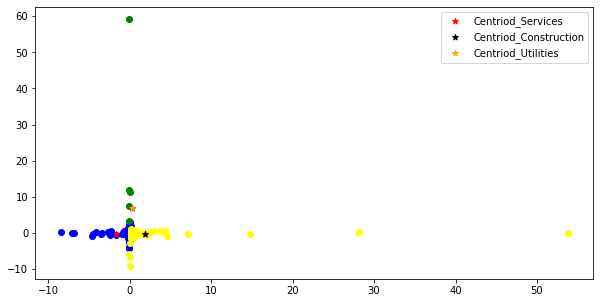

In [108]:
# visualization of clusters against the extracted PCA features from test cases
# to show the distributions of PCA test data points around the centroid

Services = tst_pca_df[df3.Classified_Output_Clusters==0] # derived from cluster model
Construction = tst_pca_df[df3.Classified_Output_Clusters==1] # derived from cluster model
Utilities = tst_pca_df[df3.Classified_Output_Clusters==2] # derived from cluster model

plt.scatter(Services['Pc1t'], Services['Pc2t'], color = 'blue' )  # pc1 and pc2 from new data 
plt.scatter(Construction['Pc1t'], Construction['Pc2t'], color = 'yellow' ) # pc1 and pc2 from new data
plt.scatter(Utilities['Pc1t'], Utilities['Pc2t'], color = 'green' ) # pc1 and pc2 from new data


plt.scatter(Cent_c[0:,0], Cent_c[0:,1], color = 'red', marker ='*', label='Centriod_Services') # from the cluster model
plt.scatter(Cent_c[1:,0], Cent_c[1:,1],  color = 'black', marker ='*', label='Centriod_Construction') # from the cluster model
plt.scatter(Cent_c[2:,0], Cent_c[2:,1],  color = 'orange', marker ='*', label='Centriod_Utilities') # from the cluster model
plt.legend()


# outputs explanations
# - related professions clustered around similar centroid point
# - the closer the point to the centre the better the degree of similarity